In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix as cm
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

In [2]:
data = pd.read_csv("data_2.csv")

In [3]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
data.diagnosis = data.diagnosis.apply(lambda x: 1 if x == 'M' else 0)

In [5]:
label = data.diagnosis
data.drop(columns = ["diagnosis", "id", "Unnamed: 32"], inplace=True)

In [6]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [7]:
data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [8]:
X_train, X_test, y_train, y_test = tts(data, label, test_size=0.2, random_state=42, stratify=label)

In [9]:
classifier = lr(random_state=42, max_iter=500, verbose=1).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


In [10]:
classifier.predict(X_test)

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1])

In [11]:
classifier.score(X_test, y_test)

0.9736842105263158

In [12]:
cm(y_test, classifier.predict(X_test))

array([[71,  1],
       [ 2, 40]])

# How a confusion matrix works

The confusion matrix is tells you a lot more about how your model exactly classifies the data, beyond the accuracy scoring. For a n-class classification, we get a n^2 matrix, where each matrix entry tells you how the class prediction is. For our use case, we'll look at 2-class classification. 

the  matrix above means the following -> (tn, fp, fn, tp) where (t,f) are true and false, which denotes whether the prediction was correct or not, and (p, n) are positive and negative which denotes whether the model predicted it as a positive hit or a negative hit. With that in mind, "tn" would mean the the prediction is _correct_ and the model predicted _negative_. 

Below is a visual depiction of confusion matrix
![](image1.png)

The matrix is better explained by my favourite **cancer patient who bought a burglary detection system** example. With the example in mind, precision would be defined as how precise your model is at detecting something, whereas recall is defined as how good the model is at detecting all the positives. 

So, 

**Recall = TP/(TP + FN)** _(To have high recall, the model should make sure that if it says negative, it better be true else FN increases)_

**Precision = TP/(TP + FP)** _(To have have high precision, the model should make sure that if it says positive, it better be true else FP increases)_


In [13]:
precision = 40/(40+2)
recall = 40/(40+1)

In [14]:
precision

0.9523809523809523

In [15]:
recall

0.975609756097561

# F1 score
The F1 score is a way to combine both precision and recall into one metric. It is the harmonic mean of precision and recall, because harmonic mean punishes extremes. if your model is highly precise, but has very bad recall (meaning whatever it predicted as true are correct, but it missed out on a lot of positives), then F1 score would be very low instead of being a simple average. 

In [16]:
f1 = 2*precision*recall/(precision+recall)

In [17]:
f1

0.963855421686747

# AUROC curves

Before we get into ROC and AUC curves, there are two more measurement we need to know, specificity and FPR. 

**Sensitivity/recall/TPR** - TP/(TP + FN), we already know what this is, ratio of positives we predicted correctly.

**specificity** = TN/(TN + FP)

**False positive rate = 1 - Specificity** =  FP/(TN + FP)


FPR is basically how many of the negative classes did we predict incorrectly. Specificity is the opposite, being how many negative classes did we predict correctly. 

Now, F1 scores seem good, then why do we ned ROC and AUC curves? ROC and AUC curves are metrics for when we ask the model to predict probabilities and want theflexibility of creating our own thresholds for prediction. 


In [18]:
probabilities = classifier.predict_proba(X_test)

In [19]:
pred = pd.DataFrame(np.around(probabilities, decimals=4), columns = ["0", "1"])

In [20]:
pred

,0,1
0,0.9996,0.0004
1,0.0000,1.0000
2,0.9601,0.0399
3,0.4270,0.5730
4,0.4920,0.5080
5,0.9994,0.0006
6,0.2357,0.7643
7,0.9990,0.0010
8,0.9994,0.0006
9,0.9897,0.0103


The above table shows probabilities that our prediction falls in either of the classes. The model sets the threshold to be >0.5 by default any class, but if we want the model to be really sure about what it predicts, we can increase the threshold to say, >0.8, which means only if the probabilities are higher than 0.8 we will say it's that class, else it will be the other class. Every time we change threshold, the confusion matrix changes. 

The ROC AUC curves are built upon the same metrics we saw above, we simply perform a threshold sweep to cover all thresholds and get metric scores at all these thresholds to create a graph. 

In [21]:
thresh7 = pred["1"].apply(lambda x: 1 if x > 0.7 else 0)
thresh8 = pred["1"].apply(lambda x: 1 if x > 0.8 else 0)
new = pd.concat([pred, thresh7, thresh8], axis = 1)

In [22]:
new

,0,1,1,1
0,0.9996,0.0004,0,0
1,0.0000,1.0000,1,1
2,0.9601,0.0399,0,0
3,0.4270,0.5730,0,0
4,0.4920,0.5080,0,0
5,0.9994,0.0006,0,0
6,0.2357,0.7643,1,0
7,0.9990,0.0010,0,0
8,0.9994,0.0006,0,0
9,0.9897,0.0103,0,0


![](image2.png)

Now the AUROC curve or area under the receiver characteristic operator is a simple metric to tell how good the model is at discriminating between positive and negative cases given a random datapoint. Numerically AUROC lies between 0 to 1, with 1 being everything is correctly classified, 0 being all positives are classified as negatives and vice versa, and 0.5 being it is doing random classification. 

It is a plot between true positive rate (recall) and false positive rate. the curve in itself is made on various thresholds which aren't shown in the graph, and the score is also something which has to be calculated explicitely. going by this, you can see that the top left corner is the best classifier, but then why do we calculate the area? The area under the curve is an approximation of how well our model can discriminate the classes.  

![](image3.png)

With that definition, an AUROC of 80% means "80% of the time the model correctly discriminates between positive and negative classes than a random guess". How is this better than a accuracy score? or when should I use which metric? The following [article](https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc) explains it brilliantly.

TO summarise it very briefly, **accuracy** is good when there is very little to no imbalance in classes, **F1 score** is used when there is heavy imbalance in classes and you care only about the positive class, and **AUROC** curve is used when the imbalance is present but not very heavy, you care about both positive and negative classes, and want to rank the predictions in order of their probabiliese instead of having one absolute value.  

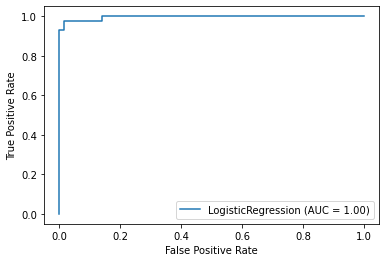

In [23]:
plot_roc_curve(classifier, X_test, y_test)